In [1]:
.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Turning image to Dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
w,h = 199,199
batch_size = 16

train_path = 'Downloads/archive (10)/dataset2-master/dataset2-master/images/TRAIN'
test_path = 'Downloads/archive (10)/dataset2-master/dataset2-master/images/TEST'
val_path = 'Downloads/archive (10)/dataset2-master/dataset2-master/images/TEST_SIMPLE'


train_img_gen = ImageDataGenerator(
    rescale=1.0/255,
#     zoom_range=0.2,
    # rotation_range=10,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # horizontal_flip=True,
    # vertical_flip=True,
    # fill_mode="nearest"


test_img_gen = ImageDataGenerator(
    rescale = 1.0/255,
)

val_img_gen = ImageDataGenerator(
    rescale=1.0/255,
#     zoom_range=0.2,
    # rotation_range=30,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # horizontal_flip=True,
    # vertical_flip=True,
    # fill_mode="nearest"
)

# Datasets
train_dataset = train_img_gen.flow_from_directory(
    train_path,
    target_size=(w,h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_dataset = test_img_gen.flow_from_directory(
    test_path,
    target_size=(w,h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_dataset = val_img_gen.flow_from_directory(
    val_path,
    target_size=(w,h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [3]:
train_dataset.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

(16, 199, 199, 3)


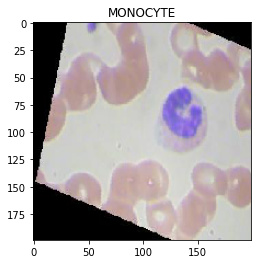

(16, 199, 199, 3)


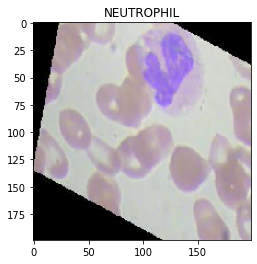

(16, 199, 199, 3)


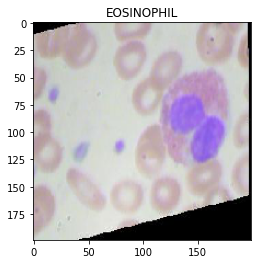

(16, 199, 199, 3)


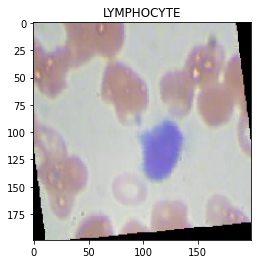

In [4]:
classes = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

for _ in range(4):
    img, label = train_dataset.next()
    print(img.shape)
    plt.title(classes[np.argmax(label[0])])
    plt.imshow(img[0])
    plt.show()

In [5]:
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(64, (5, 5), strides=2, activation='relu', input_shape=(w, h, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(256, (3, 3),strides=2, activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=2))
model.add(layers.Conv2D(128, (3, 3),strides=2, activation='relu'))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))

# model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=1))
# model.add(layers.GlobalMaxPool2D())

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))  # dropout to avoid overfitting
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))  # dropout to avoid overfitting

model.add(layers.Dense(4, activation='softmax'))  # softmax is used as it is a multiclass problem

# compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         295040    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)        

In [15]:
# Save best model
weight_path = 'model'

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

model_checkpoint = ModelCheckpoint(
    filepath = weight_path,
    save_best_only = True,
    save_weights_only = True,
    mode = 'max',
    monitor = 'val_accuracy'
)

tf.random.set_seed(42)
epoch = 20

history = model.fit(train_dataset, epochs=epoch, validation_data=test_dataset, callbacks=[model_checkpoint, early_stopping])

Epoch 1/20
623/623 [==============================] - 60s 96ms/step - loss: 0.3722 - accuracy: 0.8370 - val_loss: 0.8469 - val_accuracy: 0.7041
Epoch 2/20
623/623 [==============================] - 64s 103ms/step - loss: 0.3244 - accuracy: 0.8602 - val_loss: 0.7306 - val_accuracy: 0.7218
Epoch 3/20
623/623 [==============================] - 69s 110ms/step - loss: 0.2771 - accuracy: 0.8769 - val_loss: 0.7431 - val_accuracy: 0.7262
Epoch 4/20
623/623 [==============================] - 69s 111ms/step - loss: 0.2419 - accuracy: 0.8971 - val_loss: 0.9629 - val_accuracy: 0.7121
Epoch 5/20
623/623 [==============================] - 69s 111ms/step - loss: 0.2096 - accuracy: 0.9102 - val_loss: 1.2063 - val_accuracy: 0.6852
Epoch 6/20
623/623 [==============================] - 70s 112ms/step - loss: 0.1919 - accuracy: 0.9234 - val_loss: 1.2478 - val_accuracy: 0.6759
Epoch 7/20
623/623 [==============================] - 68s 109ms/step - loss: 0.1533 - accuracy: 0.9409 - val_loss: 1.1596 - val_acc

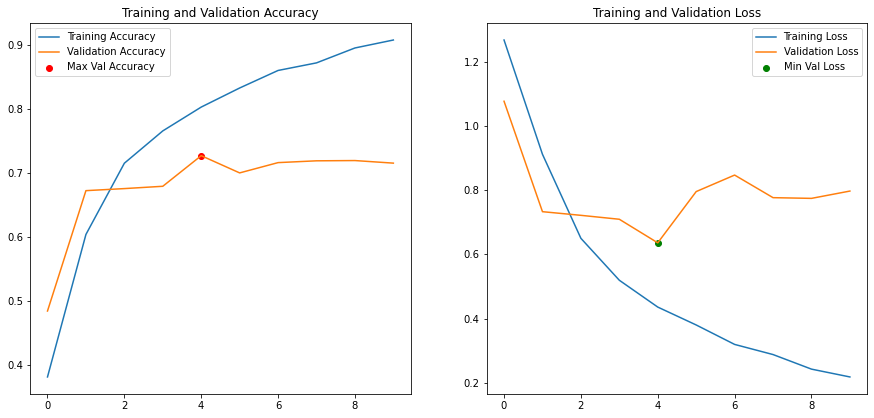

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(15, 15))

# Plotting Accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Marking the highest validation accuracy point
max_val_acc_index = val_acc.index(max(val_acc))
plt.scatter(max_val_acc_index, max(val_acc), color='red', marker='o', label='Max Val Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Marking the lowest validation loss point
min_val_loss_index = val_loss.index(min(val_loss))
plt.scatter(min_val_loss_index, min(val_loss), color='green', marker='o', label='Min Val Loss')
plt.legend()

plt.show()

156/156 [==============================] - 16s 102ms/step
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       623
           1       0.97      1.00      0.98       620
           2       0.93      0.75      0.83       620
           3       0.56      0.66      0.61       624

    accuracy                           0.73      2487
   macro avg       0.74      0.73      0.73      2487
weighted avg       0.74      0.73      0.73      2487

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}


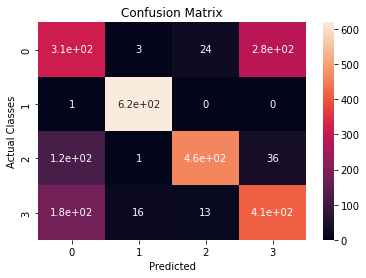

In [13]:
# load best weights to model
model.load_weights(weight_path)

# make predictions
predictions = model.predict(test_dataset)

# we have to get the position of the maximum value from each sample.
predicted_class = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_dataset.classes

sns.heatmap(confusion_matrix(true_labels, predicted_class), annot=True)

# Print classification report
print(classification_report(true_labels, predicted_class))
print(test_dataset.class_indices)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual Classes')
plt.show()

1/1 [==============================] - 0s 187ms/step


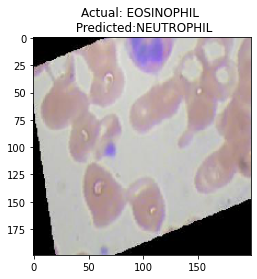

1/1 [==============================] - 0s 116ms/step


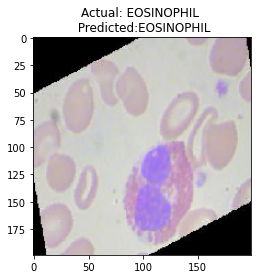

1/1 [==============================] - 0s 122ms/step


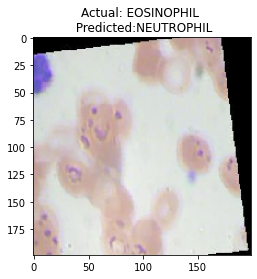

1/1 [==============================] - 0s 115ms/step


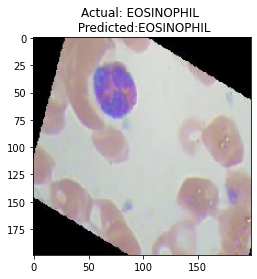

1/1 [==============================] - 0s 51ms/step


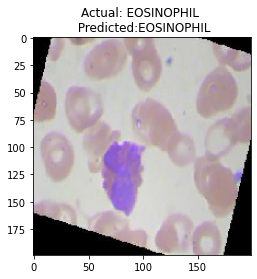

In [14]:
classes = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

for _ in range(5):
    img, label = test_dataset.next()
    
    prediction = model.predict(img)
    # predicted_class = classes[np.argmax(prediction[0])]
    plt.title(f"Actual: {classes[np.argmax(label[0])]} \n Predicted:{classes[np.argmax(prediction[0])]}")
    plt.imshow(img[0])
    plt.show()

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

w, h = 199, 199
batch_size = 16
sequence_length = 10  # Define the sequence length for the RNN
features = w * h  # Number of features per time step

train_path = 'Downloads/archive (10)/dataset2-master/dataset2-master/images/TRAIN'
test_path = 'Downloads/archive (10)/dataset2-master/dataset2-master/images/TEST'
val_path = 'Downloads/archive (10)/dataset2-master/dataset2-master/images/TEST_SIMPLE'

In [17]:
train_img_gen = ImageDataGenerator(rescale=1.0 / 255)
test_img_gen = ImageDataGenerator(rescale=1.0 / 255)
val_img_gen = ImageDataGenerator(rescale=1.0 / 255)

train_dataset = train_img_gen.flow_from_directory(
    train_path,
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_dataset = test_img_gen.flow_from_directory(
    test_path,
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_dataset = val_img_gen.flow_from_directory(
    val_path,
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()

# RNN layer
sequence_length = 100  # Replace this with your actual sequence length
features = 10  # Replace this with the number of features in each time step
model.add(SimpleRNN(64, activation='relu', input_shape=(sequence_length, features)))

# Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Assuming it's a classification problem with 4 classes

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4800      
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 22468 (87.77 KB)
Trainable params: 22468 (87.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split


# Generate or load your data (replace this with your data loading/preprocessing)
# Example random data generation for demonstration purposes:
np.random.seed(42)
data_size = 1000
sequence_length = 100
features = 10
num_classes = 4

X = np.random.random((data_size, sequence_length, features))
y = np.random.randint(num_classes, size=(data_size))

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(sequence_length, features)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 27
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/27
22/22 [==============================] - 2s 32ms/step - loss: 1.3881 - accuracy: 0.2529 - val_loss: 1.3897 - val_accuracy: 0.2133
Epoch 2/27
22/22 [==============================] - 0s 21ms/step - loss: 1.3798 - accuracy: 0.2914 - val_loss: 1.3916 - val_accuracy: 0.2400
Epoch 3/27
22/22 [==============================] - 1s 27ms/step - loss: 1.3760 - accuracy: 0.3114 - val_loss: 1.3937 - val_accuracy: 0.2533
Epoch 4/27
22/22 [==============================] - 0s 22ms/step - loss: 1.3722 - accuracy: 0.3300 - val_loss: 1.3926 - val_accuracy: 0.2400
Epoch 5/27
22/22 [==============================] - 1s 26ms/step - loss: 1.3681 - accuracy: 0.3357 - val_loss: 1.3918 - val_accuracy: 0.2200
Epoch 6/27
22/22 [==============================] - 0s 19ms/step - loss: 1.3645 - accuracy: 0.3329 - val_loss: 1.3957 - val_accuracy: 0.2200
Epoch 7/27
22/22 [==============================] - 0s 15ms/step - loss: 1.3588 - accuracy: 0.3600 - val_loss: 1.3976 - val_accuracy: 0.2533
Epoch 8/27
22

In [20]:
from sklearn.metrics import classification_report

# Predict probabilities for each class
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Calculate classification metrics
report = classification_report(y_test, y_pred)
print(report)
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


5/5 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.14      0.19      0.16        31
           1       0.28      0.37      0.32        35
           2       0.22      0.14      0.17        49
           3       0.25      0.20      0.22        35

    accuracy                           0.22       150
   macro avg       0.22      0.23      0.22       150
weighted avg       0.22      0.22      0.22       150

Confusion Matrix:
[[10  7 10  5]
 [12 10 10  7]
 [ 8 11  7 10]
 [14 18  5  6]]


5/5 [==============================] - 0s 7ms/step


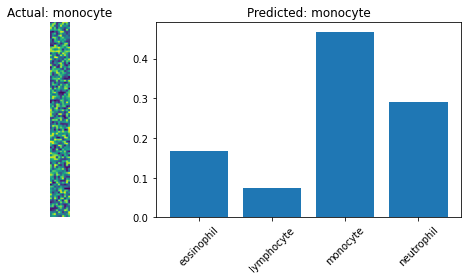

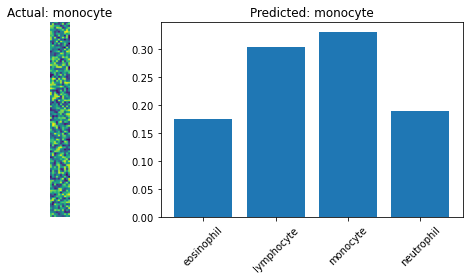

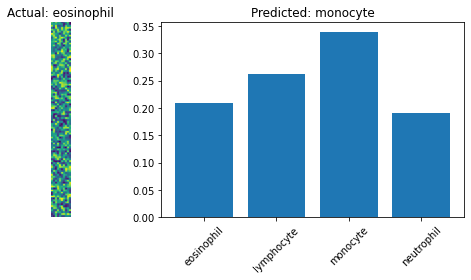

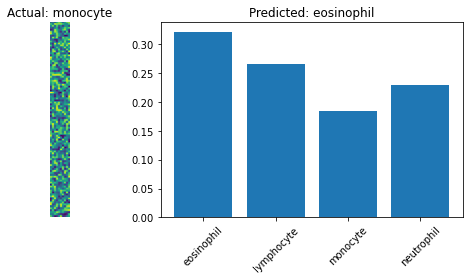

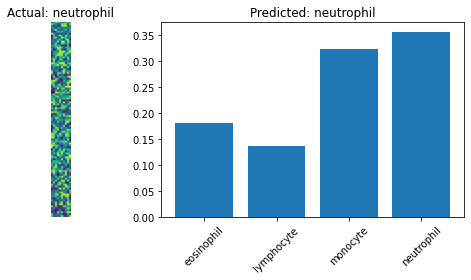

In [21]:
import matplotlib.pyplot as plt

# Assuming you have X_test_images containing the test images

# Predict probabilities for each class
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Display images with predicted and actual labels
classes = ['eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']  # Replace with your actual class names

num_images_to_display = 5  # Change this value as needed
for i in range(num_images_to_display):
    plt.figure(figsize=(8, 4))
    
    # Show the image
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[i])  # Assuming X_test contains the images
    plt.title(f'Actual: {classes[y_test[i]]}')
    plt.axis('off')
    
    # Show the predicted label
    plt.subplot(1, 2, 2)
    plt.bar(classes, y_pred_probabilities[i])
    plt.title(f'Predicted: {classes[y_pred[i]]}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
